In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [38]:
class_names=['zero','one','two','three','four','five','six','seven','eight','nine']

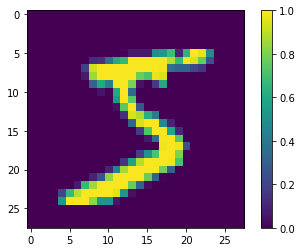

In [7]:
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')>0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    plt.imshow(x_train[0])
    plt.colorbar()
    plt.show()

    callbacks = myCallback()



In [8]:
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3368 - accuracy: 0.9004
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0835 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0494 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0359 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0259 - accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0089 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0095 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.011

In [39]:
predictions= model.predict(x_test)
np.argmax(predictions[5])

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

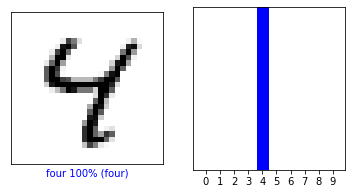

In [42]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()